# On Recursion

## Agenda

1. Recursion
    - stopping recursion: simplification & base cases
2. Recursive "shapes":
    - Linear (single) recursion:
        - Factorial
        - Addition
        - Binary search
    - Tree (multiple) recursion: *divide and conquer*
        - Fibonacci numbers
        - Tower of Hanoi
        - Merge sort
        - Making change
3. The Call Stack and Stack Frames
    - simulating recursion
    - debugging with `pdb` and `%debug`

## 1. Recursion

Recursive functions, directly or indirectly, call themselves. 

Recursive solutions are applicable when a problem can be broken down into more easily solved sub-problems that resemble the original, and whose solutions can then be combined.

E.g., computing the combined price of a bunch of nested shopping bags of items:

In [5]:
class Bag:
    def __init__(self, price, *contents): # * is list of remaining parameters
        self.price = price
        self.contents = contents

In [6]:
bag1 = Bag(10)

In [7]:
bag1.price

10

In [8]:
bag1.contents

()

In [9]:
bag2 = Bag(5, Bag(3))

In [10]:
bag2.price

5

In [11]:
bag2.contents

(<__main__.Bag at 0x1cfd25beb00>,)

In [12]:
bag2.contents[0].price

3

In [13]:
bag3 = Bag(5, Bag(4, Bag(3)), Bag(2))

In [14]:
bag4 = Bag(0, Bag(5), Bag(10), Bag(3, Bag(2), Bag(100)), Bag(9, Bag(2, Bag(25))))

In [15]:
def price(bag):
    p = bag.price
    for b in bag.contents:
        p += price(b) # recursive call
        
#         b.price
#         for bb in b.contents:
#             p += bb.price
    return p

In [16]:
price(bag4)

156

### Stopping recursion: simplification & base case(s)

In [4]:
import sys
sys.setrecursionlimit(100)#Limits data available to the stack

In [17]:
def silly_rec(n):
    print(n)
    if n == 0: #Can have multiple base cases
        #Do not recurse, base case
        pass
    elif n == 1: # Base case # 2
        pass
    else:
        silly_rec(n-1) #recurse while reducing the size of the problem

In [18]:
silly_rec(1)

1


In [19]:
silly_rec(10)

10
9
8
7
6
5
4
3
2
1


## 2. Recursive "shapes"

### Linear recursion
Can be written in one line, each function calls itself one time, can be rewrittend as a loop

#### Example: Factorial

$n! = \begin{cases}
        1 & \text{if}\ n=0 \\
        n \cdot (n-1)! & \text{if}\ n>0
      \end{cases}$


i.e., $n! = n \cdot (n-1) \cdot (n-2) \cdots 3 \cdot 2 \cdot 1$

In [21]:
def rec_factorial(n):
    print('n = ', n)
    if n == 0:
        return 1
    else:
        return (n*rec_factorial(n-1)) #Printed on the way out

rec_factorial(10)

n =  10
n =  9
n =  8
n =  7
n =  6
n =  5
n =  4
n =  3
n =  2
n =  1
n =  0


3628800

In [22]:
rec_factorial(0) #Linear recursion, one function calling another

n =  0


1

#### Example: Addition of two positive numbers $m$, $n$

$m + n = \begin{cases}
           m & \text{if}\ n=0 \\
           (m + 1) + (n - 1) & \text{if}\ n > 0
      \end{cases}$

In [23]:
def add(m, n):
    print('m, n = ', (m, n))
    if n == 0:
        return m
    else:
        return add(m+1, n-1)

In [24]:
add(5, 0)

m, n =  (5, 0)


5

In [25]:
add(5, 1)

m, n =  (5, 1)
m, n =  (6, 0)


6

In [26]:
add(5, 5)

m, n =  (5, 5)
m, n =  (6, 4)
m, n =  (7, 3)
m, n =  (8, 2)
m, n =  (9, 1)
m, n =  (10, 0)


10

#### Example: Binary search

In [27]:
def bin_search(x, lst): # Log(n) calls to binary search
    mid = len(lst) // 2
    if lst[mid] == x:
        return True
    elif mid == 0:
        return False
    elif x > lst[mid]:
        #Binary search the bigger half
        return bin_search(x, lst[mid+1:]) # The n elements copied makes it O(n)
    else:
        return bin_search(x, lst[:mid])

In [28]:
bin_search(20, list(range(100)))

True

In [29]:
bin_search(-1, list(range(100)))

False

In [30]:
bin_search(50.5, list(range(100)))

False

### Tree recursion
Each function call calls itself multiple times, very expensive run time

#### Example: Fibonacci numbers

$fib(n) = \begin{cases}
            0 & \text{if}\ n=0 \\
            1 & \text{if}\ n=1 \\
            fib(n-1) + fib(n-2) & \text{otherwise}
          \end{cases}$
          
i.e., 0, 1, 1, 2, 3, 5, 8, 13, 21, ... Can be done without recursion

In [32]:
def rec_fib(n):
    print('n = ', n)
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return (rec_fib(n-1) + rec_fib(n-2))

rec_fib(7)

n =  7
n =  6
n =  5
n =  4
n =  3
n =  2
n =  1
n =  0
n =  1
n =  2
n =  1
n =  0
n =  3
n =  2
n =  1
n =  0
n =  1
n =  4
n =  3
n =  2
n =  1
n =  0
n =  1
n =  2
n =  1
n =  0
n =  5
n =  4
n =  3
n =  2
n =  1
n =  0
n =  1
n =  2
n =  1
n =  0
n =  3
n =  2
n =  1
n =  0
n =  1


13

#### Example: Tower of Hanoi

Setup: three rods, with one or more discs of different sizes all stacked on one rod, smallest (top) to largest (bottom). E.g.,

         ||          ||          ||     
         ==          ||          ||     
        ====         ||          ||     
       ======        ||          ||     
    ------------------------------------
    
Goal: move all the discs, one by one, to another rod, with the rules being that (1) only smaller discs can be stacked on larger ones and (2) only the top disc in a stack can be moved to another rod.

For three discs, as shown above, we would carry out the following sequence to move the stack to the rightmost rod. The rods are abbreviated L (left), M (middle), R (right):
1. Move the small disc (0) from L to R
2. Move the medium disc (1) from L to M
3. Move 0 from R to M (R is empty)
4. Move the large disc (2) from L to R
5. Move 0 from M to L
6. Move 1 from M to R
7. Move 0 from L to R (done)

Can you come up with the sequence needed to move a stack of 4 discs from one rod to another? 5 discs? An arbitrary number of discs?

In [56]:
height = 5
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

def move(frm, to):
    towers[to].append(towers[frm].pop(-1))
    display()

def hanoi(frm, to, using, levels):
    if levels == 1:
        move(frm, to)
    else:
        hanoi(frm, using, to, levels-1)# Calls itself, makes it recursion
        move(frm, to)
        hanoi(using, to, frm, levels-1)

In [57]:
towers

[[5, 4, 3, 2, 1], [], []]

In [52]:
from time import sleep
from IPython.display import clear_output

def display():
    clear_output(True)
    print('{:^12}'.format('||') * 3)
    for level in range(height, 0, -1):
        for t in towers:
            try:
                print('{:^12}'.format('==' * t[level-1]), end='')
            except IndexError:
                print('{:^12}'.format('||'), end='')
        print()
    print('-' * 36)
    sleep(1)

In [53]:
move(0,2)

     ||          ||          ||     
     ||          ||          ||     
    ====         ||          ||     
   ======        ||          ||     
  ========       ||          ||     
 ==========      ||          ==     
------------------------------------


In [54]:
display()

     ||          ||          ||     
     ||          ||          ||     
    ====         ||          ||     
   ======        ||          ||     
  ========       ||          ||     
 ==========      ||          ==     
------------------------------------


In [58]:
hanoi(0, 2, 1, 5)

     ||          ||          ||     
     ||          ||          ==     
     ||          ||         ====    
     ||          ||        ======   
     ||          ||       ========  
     ||          ||      ========== 
------------------------------------


#### Example: Mergesort

In [2]:
def merge(l1, l2): # O(N), where N is the number of elements in the two lists
    merged = [] # N comparisons, N iterations, has to be sorted
    i1 = i2 = 0 #Not a sort, just concats two sorted lists
    while i1 < len(l1) or i2 < len(l2):
        if i2 == len(l2) or (i1 < len(l1) 
                             and l1[i1] < l2[i2]):
            merged.append(l1[i1])
            i1 += 1
        else:
            merged.append(l2[i2])
            i2 += 1
    return merged

In [3]:
l1 = [1, 5, 9]
l2 = [2, 6, 8, 11]

merge(l1, l2)

[1, 2, 5, 6, 8, 9, 11]

In [28]:
def mergesort(lst): # O( NLOG(N))
    if len(lst) <= 1:
        return lst
    else:
        mid = len(lst) // 2
        return merge((mergesort(lst[:mid])),(mergesort(lst[mid:])))

In [31]:
import random
lst = list(range(10))
random.shuffle(lst)

In [32]:
lst

[3, 1, 4, 8, 2, 9, 7, 0, 5, 6]

In [33]:
mergesort(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1] # swap
            else:
                break   

In [35]:
class Heap:
    def __init__(self):
        self.data = []

    @staticmethod
    def _parent(idx):
        return (idx-1)//2
        
    @staticmethod
    def _left(idx):
        return idx*2+1

    @staticmethod
    def _right(idx):
        return idx*2+2
    
    def _heapify(self, idx=0):
        while True:
            l = Heap._left(idx)
            r = Heap._right(idx)
            maxidx = idx
            if l < len(self) and self.data[l] > self.data[idx]:
                maxidx = l
            if r < len(self) and self.data[r] > self.data[maxidx]:
                maxidx = r
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break
            
    def add(self, x):
        self.data.append(x)
        i = len(self.data) - 1
        p = Heap._parent(i)
        while i > 0 and self.data[p] < self.data[i]:
            self.data[p], self.data[i] = self.data[i], self.data[p]
            i = p
            p = Heap._parent(i)
        
    def max(self):
        return self.data[0]

    def pop_max(self):
        ret = self.data[0]
        self.data[0] = self.data[len(self.data)-1]
        del self.data[len(self.data)-1]
        self._heapify()
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)


def heapsort(iterable):
    heap = Heap()
    for x in iterable:
        heap.add(x)
    sorted_lst = []
    while heap:
        sorted_lst.append(heap.pop_max())
    sorted_lst.reverse()
    return sorted_lst

In [36]:
import timeit
import random
insertionsort_times = []
heapsort_times = []
mergesort_times = []
for size in range(100, 3000, 100):
    insertionsort_times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='import random ; from __main__ import insertion_sort ; '
                                         'lst = [random.random() for _ in range({})]'.format(size),
                               number=1))
    heapsort_times.append(timeit.timeit(stmt='heapsort(lst)',
                               setup='import random ; from __main__ import heapsort ; '
                                         'lst = [random.random() for _ in range({})]'.format(size),
                               number=1))
    mergesort_times.append(timeit.timeit(stmt='mergesort(lst)'.format(size),
                               setup='import random ; from __main__ import mergesort ; '
                                         'lst = [random.random() for _ in range({})]'.format(size),
                               number=1))

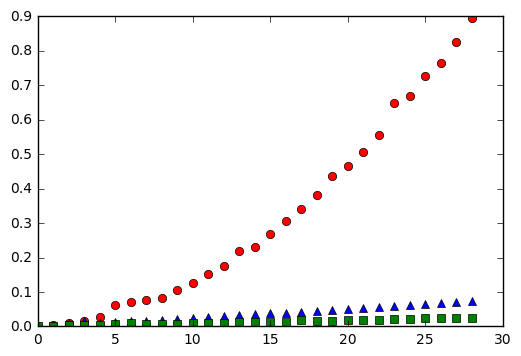

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(insertionsort_times, 'ro')
plt.plot(heapsort_times, 'b^')
plt.plot(mergesort_times, 'gs')
plt.show()

#### Example: Making Change

Question: how many different ways are there of making up a specified amount of money, given a list of available denominations?

E.g., how many ways of making 10 cents, given 1c, 5c, 10c, 25c coins?

In [45]:
def change(amount, denoms):
    if amount == 0:
        return [()]
    elif amount < 0 or not denoms:
        return []
    else:
        ways = []
        
        ways.extend(change(amount, denoms[1:]))
        
        ways.extend([w + (denoms[0],) for w in change(amount-denoms[0], denoms)] )
           
        return ways

In [46]:
change(5, (1, 5, 10, 25))

[(5,), (1, 1, 1, 1, 1)]

In [47]:
change(10, (1, 5, 10, 25))

[(10,), (5, 5), (5, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)]

In [49]:
len(change(100, (1, 5, 10, 50, 25)))

292

## 3. The Call Stack

### Simulating recursive `factorial`

In [1]:
class Stack(list):
    push = list.append
    pop  = lambda self: list.pop(self, -1)
    peek = lambda self: self[-1]
    empty = lambda self: len(self) == 0

In [2]:
s = Stack()

In [3]:
for x in range(10):
    s.push(x)

In [4]:
s

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
call_stack = Stack()

def call(arg):
    call_stack.push('<frame begin>')
    call_stack.push(('arg', arg))

def get_arg():
    return call_stack.peek()[-1]

def save_local(name, val):
    call_stack.push(('local', name, val))
    
def restore_local():
    return call_stack.pop()[2]
    
def return_with(val):
    while call_stack.pop() != '<frame begin>':
        pass
    call_stack.push(('ret', val))
    
def last_return_val():
    return call_stack.pop()[-1]

In [6]:
call(10) # initial call
while True: # recursive calls
    n = get_arg()
    if n == 1:
        return_with(1)
        break
    else:
        save_local('n', n)
        call(n-1)

In [7]:
call_stack

['<frame begin>',
 ('arg', 10),
 ('local', 'n', 10),
 '<frame begin>',
 ('arg', 9),
 ('local', 'n', 9),
 '<frame begin>',
 ('arg', 8),
 ('local', 'n', 8),
 '<frame begin>',
 ('arg', 7),
 ('local', 'n', 7),
 '<frame begin>',
 ('arg', 6),
 ('local', 'n', 6),
 '<frame begin>',
 ('arg', 5),
 ('local', 'n', 5),
 '<frame begin>',
 ('arg', 4),
 ('local', 'n', 4),
 '<frame begin>',
 ('arg', 3),
 ('local', 'n', 3),
 '<frame begin>',
 ('arg', 2),
 ('local', 'n', 2),
 ('ret', 1)]

In [15]:
ret = last_return_val()
n = restore_local()
return_with(n * ret)
call_stack

['<frame begin>', ('arg', 10), ('local', 'n', 10), ('ret', 362880)]

### Debugging with `pdb` and `%debug`

In [16]:
import sys
sys.setrecursionlimit(100)

In [17]:
def rec_factorial(n):
    if n <= 1:   # detect base case
        raise Exception('base case!')
    else:
        return n * rec_factorial(n-1)

In [18]:
rec_factorial(10)

Exception: base case!

In [ ]:
%debug
# commands to try:
# help, where, args, p n, up, u 10, down, d 10, l, up 100, u, d (& enter to repeat)

> <ipython-input-17-0eb6f9e46905>(3)rec_factorial()
      1 def rec_factorial(n):
      2     if n <= 1:   # detect base case
----> 3         raise Exception('base case!')
      4     else:
      5         return n * rec_factorial(n-1)

ipdb> help

Documented commands (type help <topic>):
EOF    c          d        h         next    pp       retval  u          whatis
a      cl         debug    help      p       psource  run     unalias    where 
alias  clear      disable  ignore    pdef    q        rv      undisplay
args   commands   display  interact  pdoc    quit     s       unt      
b      condition  down     j         pfile   r        source  until    
break  cont       enable   jump      pinfo   restart  step    up       
bt     continue   exit     n         pinfo2  return   tbreak  w        

Miscellaneous help topics:
pdb  exec

Undocumented commands:
l  list  ll  longlist

ipdb> where
  <ipython-input-18-f914dbc0d6f8>(1)<module>()
----> 1 rec_factorial(10)

  <ipython-input-17

In [1]:
def bin_search(x, lst):
    if len(lst) == 0:
        return False
    else:
        print('lo, hi = ', (lst[0], lst[-1]))
        mid = len(lst) // 2
        if x == lst[mid]:
            import pdb ; pdb.set_trace() #Helpful for debug, starts debugger when line run
            return True
        elif x < lst[mid]:
            return bin_search(x, lst[:mid])
        else:
            return bin_search(x, lst[mid+1:])

In [2]:
bin_search(20, list(range(100)))

lo, hi =  (0, 99)
lo, hi =  (0, 49)
lo, hi =  (0, 24)
lo, hi =  (13, 24)
lo, hi =  (20, 24)
lo, hi =  (20, 21)
lo, hi =  (20, 20)
> <ipython-input-1-86f6e39fcd96>(9)bin_search()
-> return True
(Pdb) hi
*** NameError: name 'hi' is not defined
(Pdb) stop
*** NameError: name 'stop' is not defined
(Pdb) end
*** NameError: name 'end' is not defined
(Pdb) quit


BdbQuit: 